In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('./models/')
from SIRH import *
import os
from SIRD_h import SIRD_h
from SIRD import *
from Arima import *
from moving_average import MovingAverage, MovingAverageMulti

In [2]:
df=pd.read_csv('hopitalized_and_infectious.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
n_hospitalized=np.array(df['hospitalized'])
n_infectious=np.array(df['n_infectious'])

In [3]:
# importing mobility from the csv file
df_mobility=pd.read_csv('mobility_bis.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)
mobility=np.array(df_mobility['mobility'])

relier_les_points=[]
for i in range(len(mobility)): 
    if i + 7 < len(mobility): 
        if i % 7 ==0:
            relier_les_points.append(mobility[i])
        else: 
            decalage=i-7*(i//7)
            res = (1-decalage/7)*mobility[7*(i//7)] + (decalage/7)*mobility[7*(i//7)+7]

            relier_les_points.append(res)
    else:
        relier_les_points.append(mobility[i])
mobility_smoothed=np.array(relier_les_points)
data3D=np.array([n_hospitalized, n_infectious, mobility_smoothed])
split=200
data3D_train=data3D[:, :split]
data_train=n_hospitalized[:split]
dates_of_pandemic_train=[i for i in range(split)]

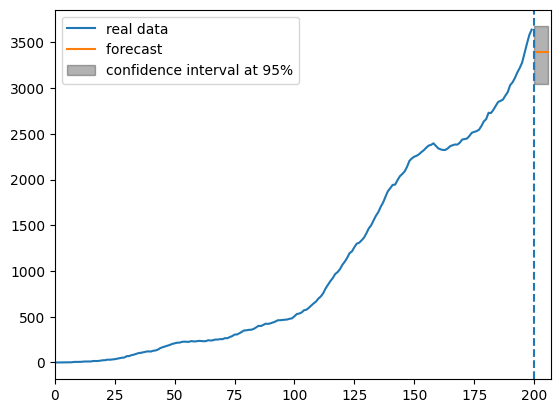

In [23]:
mymovingmulti=MovingAverageMulti()
mymovingmulti.train(dates_of_pandemic_train, data3D_train)
mymovingmulti.plot(7, 0.05)

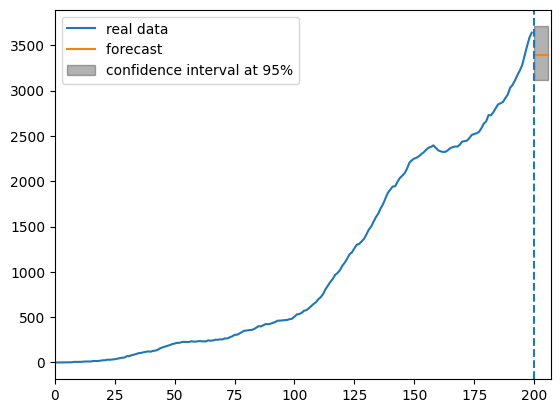

In [17]:
mymoving=MovingAverage()
mymoving.train(dates_of_pandemic_train,    data_train)
mymoving.plot(7, 0.05)

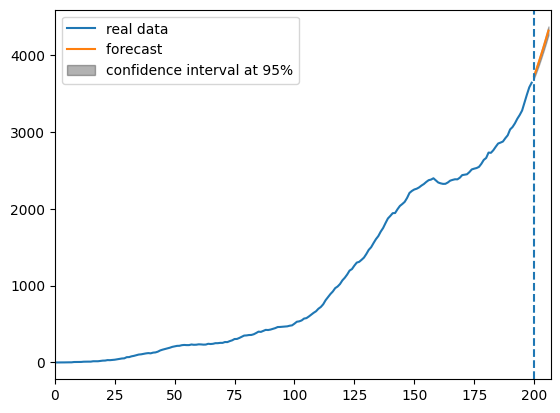

In [9]:
myvar=VAR_m()
myvar.train(None, data3D_train)
myvar.plot(7, 0.05)

In [4]:
mysirh=SIRH_model_2()
mysirh.choose_model(False, False, True)
mysirh.train( data_train)


gamma_i not constant and gamma_h not constant 


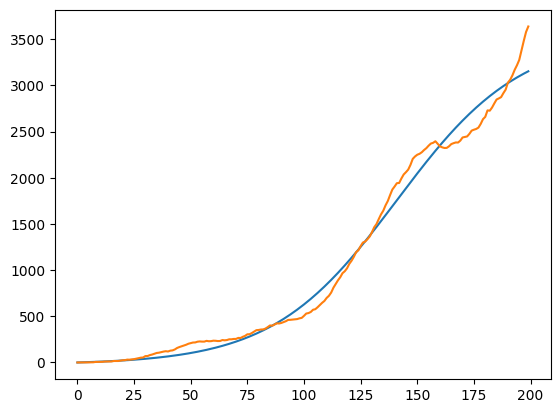

In [5]:
s_0=1000000 -1
i_0=1
r_0=0
h_0=0
dt=0.001
x0=[s_0, i_0, r_0, h_0]
plt.plot(run_sirh(x0, mysirh.beta, mysirh.gamma_i, mysirh.gamma_h, mysirh.h, t=split, dt=0.001)[3])
plt.plot(data_train)

delta-method


/users/eleves-a/2021/gregoire.bechade/code_remote/.venv/lib64/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/users/eleves-a/2021/gregoire.bechade/code_remote/.venv/lib64/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


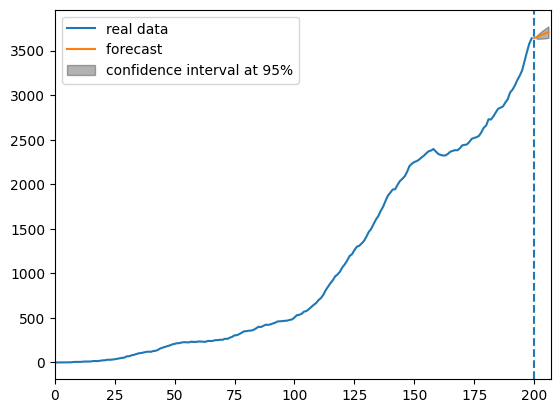

In [6]:
mysirh.plot(7, 0.05)

In [9]:
mysirh.beta, mysirh.gamma_i, mysirh.gamma_h, mysirh.h

(0.2910659245405559, 0.2, 0.2, 0.021411174331079263)

In [14]:
mysirh.beta, mysirh.gamma_h, mysirh.gamma_i,  mysirh.h

(9.999999999953316,
 2.461203013031013e-44,
 9.761711567884106,
 0.0934266777620461)

c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


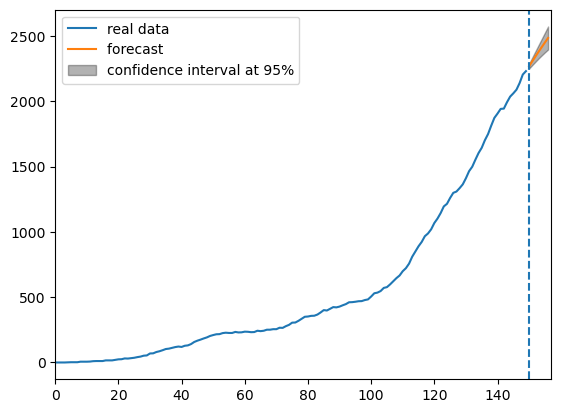

In [15]:
myarima=ARIMA_Model()
myarima.train(dates_of_pandemic_train, data_train)
myarima.plot(7, 0.05)